


# Load Dataset




In [1]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# Import dataset
df = pd.read_csv('https://github.com/abdo-projects/data-science-portfolio/raw/main/Dataset/Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Show top results 
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [2]:
# reorder and select columns related
data = df[['Date', 'Fatalities']]

# Show top results
data.head()

,Date,Fatalities
0,09/17/1908,1.0
1,07/12/1912,5.0
2,08/06/1913,1.0
3,09/09/1913,14.0
4,10/17/1913,30.0


In [3]:
# clean the dataset by dropping rows 
data = data.dropna()

# count the NaN values in a column in pandas DataFrame
data.isna().sum()

Date          0
Fatalities    0
dtype: int64

In [4]:
# Convert the Strings to Datetime and remove time in the DataFrame
data['timestamp'] = pd.to_datetime(data['Date'])

# Remove day from timestamp
data['timestamp'] = data['timestamp'].dt.strftime('%Y')

# Sort a pandas dataframe based on DateTime field
data = data.sort_values(by='timestamp',ascending=True)

# Show top results
data.head(10)

,Date,Fatalities,timestamp
0,09/17/1908,1.0,1908
1,07/12/1912,5.0,1912
2,08/06/1913,1.0,1913
3,09/09/1913,14.0,1913
4,10/17/1913,30.0,1913
5,03/05/1915,21.0,1915
6,09/03/1915,19.0,1915
7,07/28/1916,20.0,1916
8,09/24/1916,22.0,1916
9,10/01/1916,19.0,1916


In [5]:
# Show top results
data.head(10)

,Date,Fatalities,timestamp
0,09/17/1908,1.0,1908
1,07/12/1912,5.0,1912
2,08/06/1913,1.0,1913
3,09/09/1913,14.0,1913
4,10/17/1913,30.0,1913
5,03/05/1915,21.0,1915
6,09/03/1915,19.0,1915
7,07/28/1916,20.0,1916
8,09/24/1916,22.0,1916
9,10/01/1916,19.0,1916


In [6]:
#data_ml = data.copy()
#data_ml.to_csv('data.csv')

In [7]:
# Use groupby by column names and aggregate sum:
c1 = data.groupby(data['timestamp'], as_index=True, sort=False, group_keys=True).sum()
data = pd.DataFrame(c1.values, index=c1.index.values, columns=['Fatalities'])

# Show top results
data.head()

,Fatalities
1908,1.0
1912,5.0
1913,45.0
1915,40.0
1916,108.0


In [8]:
# storing into the excel file
data.to_excel("output.xlsx")

# Import dataset
data = pd.read_excel('output.xlsx',names=['timestamp', 'Fatalities'])

# Show top results 
data.head()

,timestamp,Fatalities
0,1908,1
1,1912,5
2,1913,45
3,1915,40
4,1916,108


In [9]:
#convert the strings to datetime in Pandas DataFrame
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y')

# Remove day from timestamp
data['timestamp'] = data['timestamp'].dt.strftime('%Y')

# Show top results 
data.head()

,timestamp,Fatalities
0,1908,1
1,1912,5
2,1913,45
3,1915,40
4,1916,108


In [10]:
# Show top results
data.head()

,timestamp,Fatalities
0,1908,1
1,1912,5
2,1913,45
3,1915,40
4,1916,108


In [11]:
data.tail()

,timestamp,Fatalities
93,2005,1306
94,2006,1136
95,2007,931
96,2008,820
97,2009,581


In [12]:
# Check the format of 'Date' column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   98 non-null     object
 1   Fatalities  98 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [13]:
# Check the format of 'Date' column
data.describe()

,Fatalities
count,98.000000
mean,1076.316327
std,779.428665
min,1.000000
25%,194.750000
50%,1214.000000
75%,1629.750000
max,2937.000000


# Time Series Analysis and Forecasting with ARIMA


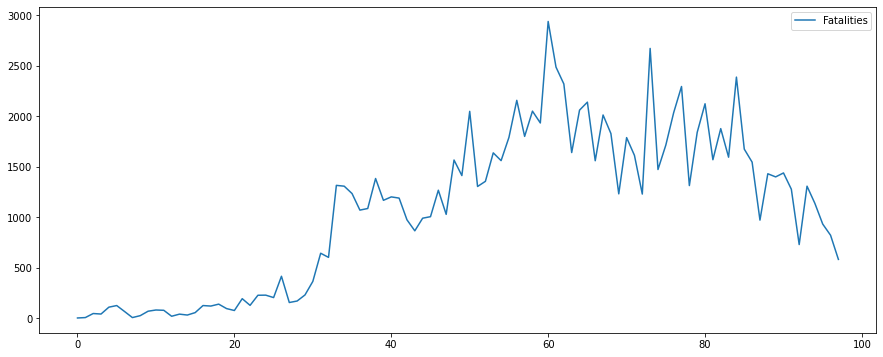

In [14]:
data.plot(figsize=(15, 6))
plt.show()

### Machine learning models

In [15]:
#print out sample data after windowing
#data_ml

In [16]:
#assigning the train, test, label and features.

features = ['Fatalities'] #features used
label = 'Fatalities' # label
test_df = data[data['timestamp'] >= '1980'] # index for test data
train_df = data[data['timestamp'] < '1980'] # index for train data
X_train, y_train = train_df[features], train_df[label] #assign train data
X_test, y_test = test_df[features], test_df[label] # assign test data

In [17]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

    Fatalities
0            1
1            5
2           45
3           40
4          108
..         ...
63        1639
64        2059
65        2138
66        1558
67        2011

[68 rows x 1 columns]
0        1
1        5
2       45
3       40
4      108
      ... 
63    1639
64    2059
65    2138
66    1558
67    2011
Name: Fatalities, Length: 68, dtype: int64
    Fatalities
68        1827
69        1230
70        1787
71        1611
72        1228
73        2670
74        1471
75        1713
76        2034
77        2293
78        1312
79        1839
80        2122
81        1568
82        1876
83        1593
84        2386
85        1673
86        1544
87         970
88        1429
89        1398
90        1437
91        1276
92         728
93        1306
94        1136
95         931
96         820
97         581
68    1827
69    1230
70    1787
71    1611
72    1228
73    2670
74    1471
75    1713
76    2034
77    2293
78    1312
79    1839
80    2122
81    1568
82    1876
83 

## Building the Model

For this tutorial, we play around with the learning_rate parameter from Xgboost. 3 different value is adjusted and the performance of the model is observed.

In [18]:
## Xgb with set value learning_rate = 0.01
from xgboost import XGBRegressor

reg1 = XGBRegressor(n_estimators=100, learning_rate=0.01)
reg1.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:869.05304	validation_1-mae:1511.36060
[1]	validation_0-mae:860.91028	validation_1-mae:1497.05725
[2]	validation_0-mae:852.84399	validation_1-mae:1482.88892
[3]	validation_0-mae:844.85327	validation_1-mae:1468.85388
[4]	validation_0-mae:836.93762	validation_1-mae:1454.95142
[5]	validation_0-mae:829.10346	validation_1-mae:1441.17993
[6]	validation_0-mae:821.34271	validation_1-mae:1427.53833
[7]	validation_0-mae:813.64484	validation_1-mae:1414.12109
[8]	validation_0-mae:806.01825	validation_1-mae:1400.73474
[9]	validation_0-mae:798.48083	validation_1-mae:1387.73633
[10]	validation_0-mae:791.00586	validation_1-mae:1374.60022
[11]	validation_0-mae:783.60901	validation_1-mae:1361.84448
[12]	validation_0-mae:776.27094	validation_1-mae:1348.95374
[13]	validation_0-mae:769.01208	validation_1-mae:1336.43628
[14]	validation_0-mae:761.82709	validation_1-mae:1323.94568
[15]	validation_0-mae:754.71484	validation_1-mae:1311.99622
[16]	validation_0-mae:747.64764	validation_1-mae:1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('MAE: ',metrics.mean_absolute_error(y_test, reg1.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, reg1.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, reg1.predict(X_test))))


MAE:  606.522294108073
MSE:  424502.7396486876
RMSE: 651.5387476188101


In [20]:
predictions = reg1.predict(X_test)

In [21]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

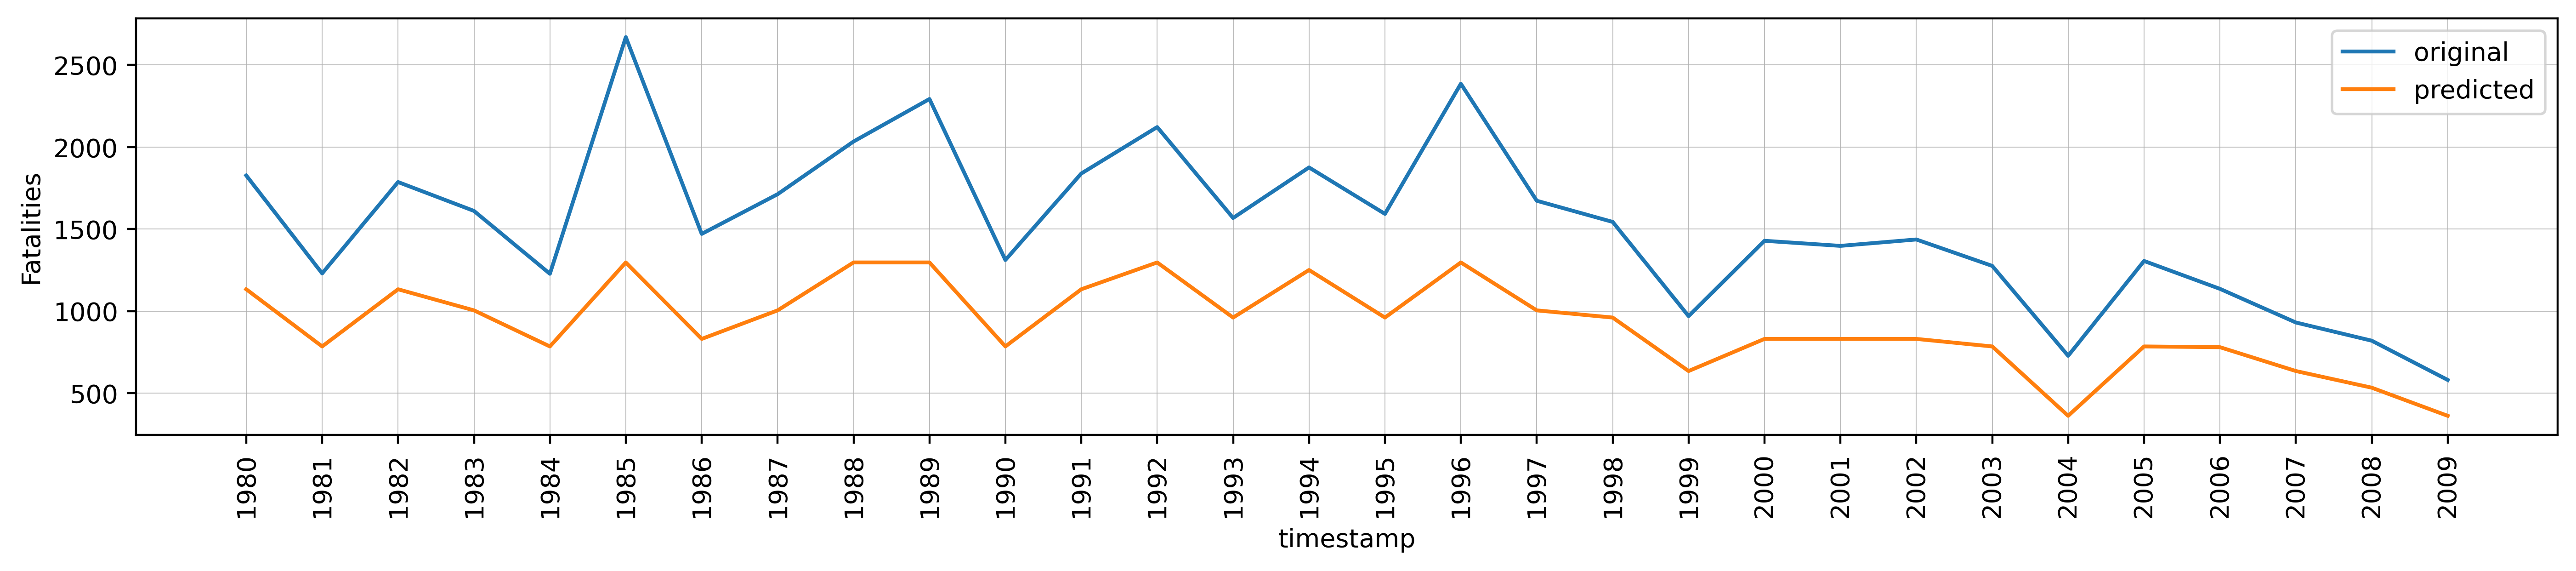

In [23]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
sns.lineplot(data=test_df, x='timestamp', y='Fatalities', label = 'original')
sns.lineplot(data=test_df, x='timestamp', y='predictions', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

Xgb with set value learning_rate = 0.3 to find the Best Model

In [62]:
## Xgb with set value learning_rate = 0.01
from xgboost import XGBRegressor

reg2 = XGBRegressor(n_estimators=100, learning_rate=1)
reg2.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:129.66043	validation_1-mae:235.17738
[1]	validation_0-mae:41.07021	validation_1-mae:71.61956
[2]	validation_0-mae:24.48900	validation_1-mae:50.44853
[3]	validation_0-mae:15.01951	validation_1-mae:49.60622
[4]	validation_0-mae:9.73236	validation_1-mae:39.89607
[5]	validation_0-mae:8.24817	validation_1-mae:38.32180
[6]	validation_0-mae:6.66003	validation_1-mae:38.27789
[7]	validation_0-mae:4.93227	validation_1-mae:36.56934
[8]	validation_0-mae:3.77188	validation_1-mae:34.96924
[9]	validation_0-mae:3.18881	validation_1-mae:34.77710
[10]	validation_0-mae:2.48301	validation_1-mae:33.83096
[11]	validation_0-mae:2.07827	validation_1-mae:33.03406
[12]	validation_0-mae:1.58924	validation_1-mae:33.03436
[13]	validation_0-mae:1.26000	validation_1-mae:32.92073
[14]	validation_0-mae:1.09832	validation_1-mae:32.91510
[15]	validation_0-mae:0.90087	validation_1-mae:32.96269
[16]	validation_0-mae:0.76792	validation_1-mae:32.95892
[17]	validation_0-mae:0.64858	validation_1-mae:32.88

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('MAE: ',metrics.mean_absolute_error(y_test, reg2.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, reg2.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, reg2.predict(X_test))))

MAE:  32.43431599934896
MSE:  2366.081322972104
RMSE: 48.64238196235978


In [64]:
predictions_2 = reg2.predict(X_test)

In [65]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions_2)

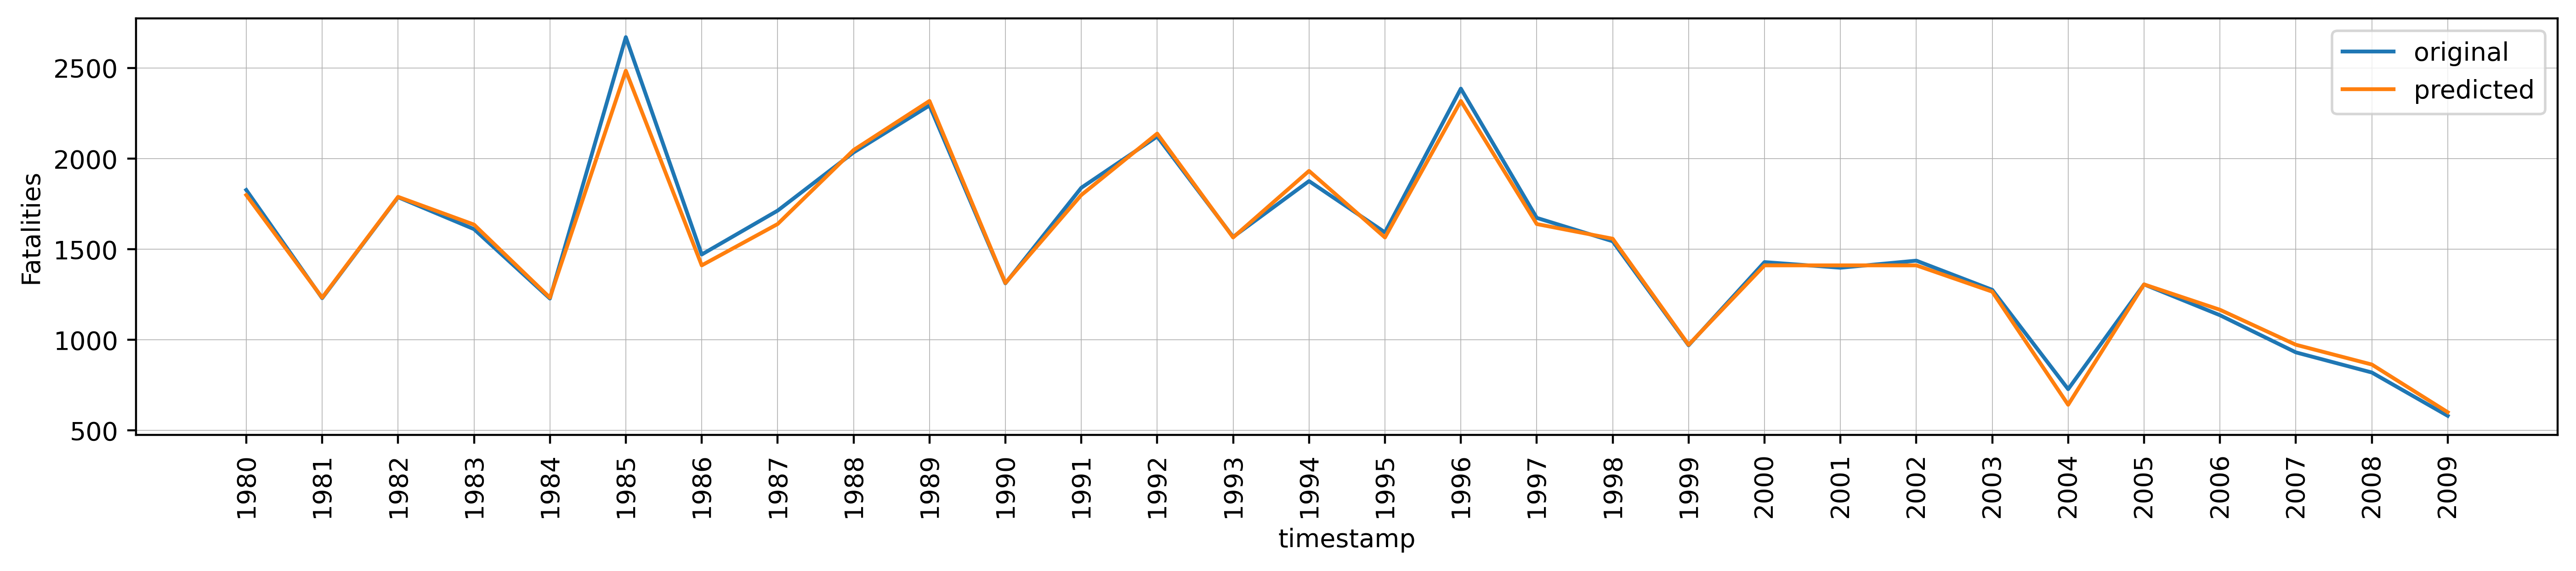

In [66]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
sns.lineplot(data=test_df, x='timestamp', y='Fatalities', label = 'original')
sns.lineplot(data=test_df, x='timestamp', y='predictions', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

## Forecast of time series

In [67]:
#This step define function used to transform a time series dataset into a supervised learning dataset.
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=2, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[0]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [69]:
# Since we have build the model, in this stage we are going to use the whole set of data again, but only select the temperature column. 
#This is because we only want to do forecasting on the temperature column.

values = data.Fatalities.values #select column temperature.
preds = [] 
# this define the number of forecasting that we want. 10 indicates 10 new value will be forecasted. You can change it accordingly.
for i in range(10): 
    # transform the time series data into supervised learning. n_in=6 meaning you are using the first 6 value to forecast the value ahead
    forecast = series_to_supervised(values, n_in=6)
    # split into input and output columns
    forecastI, forecastO = forecast[:, :-1], forecast[:, -1]
    # fit model. Took back the value the we built before.
    model = XGBRegressor(n_estimators=100, learning_rate=0.3)
    model.fit(forecastI, forecastO)
    # construct an input for a new preduction
    row = values[-6:].flatten()
    # make a prediction
    yhat = model.predict(np.asarray([row]))
    print('Input: %s, Predicted: %.3f' % (row, yhat[0]))
    values = np.append(values, yhat)
    preds.append(yhat)

Input: [ 728 1306 1136  931  820  581], Predicted: 1217.940
Input: [1306.         1136.          931.          820.          581.
 1217.94042969], Predicted: 1136.644
Input: [1136.          931.          820.          581.         1217.94042969
 1136.64416504], Predicted: 910.119
Input: [ 931.          820.          581.         1217.94042969 1136.64416504
  910.11932373], Predicted: 1131.842
Input: [ 820.          581.         1217.94042969 1136.64416504  910.11932373
 1131.84204102], Predicted: 1123.252
Input: [ 581.         1217.94042969 1136.64416504  910.11932373 1131.84204102
 1123.25158691], Predicted: 1298.381
Input: [1217.94042969 1136.64416504  910.11932373 1131.84204102 1123.25158691
 1298.3807373 ], Predicted: 1177.035
Input: [1136.64416504  910.11932373 1131.84204102 1123.25158691 1298.3807373
 1177.03491211], Predicted: 1091.425
Input: [ 910.11932373 1131.84204102 1123.25158691 1298.3807373  1177.03491211
 1091.42456055], Predicted: 1178.963
Input: [1131.84204102 1123.251